<a href="https://colab.research.google.com/github/pharringtonp19/housing-and-homelessness/blob/main/notebooks/Residualized_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Import Libraries**

In [26]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from functools import partial

#### **Expected Treatment**

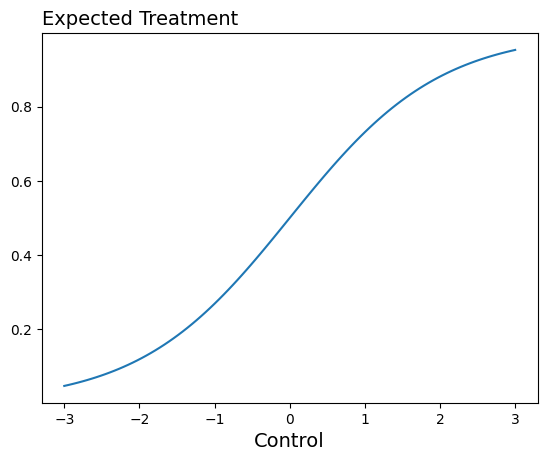

In [27]:
def expected_treatment(control):
  return jax.nn.sigmoid(control)

cs = jnp.linspace(-3, 3, 100)
ds = jax.vmap(expected_treatment)(cs)
plt.plot(cs, ds)
plt.title("Expected Treatment", loc='left', size=14)
plt.xlabel('Control', size=14)
plt.show()

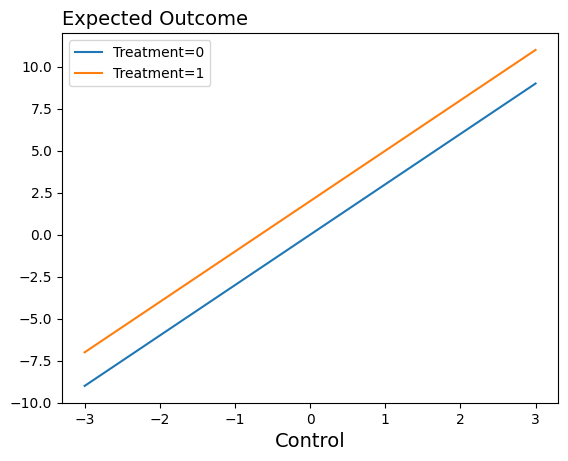

In [28]:
def expected_outcome(control, treatment):
  return 2.0*treatment + 3.0*control

cs = jnp.linspace(-3, 3, 100)
ys1 = partial(expected_outcome, treatment=0.0)(cs)
ys2 = partial(expected_outcome, treatment=1.0)(cs)
plt.plot(cs, ys1, label='Treatment=0')
plt.plot(cs, ys2, label='Treatment=1')
plt.title("Expected Outcome", loc='left', size=14)
plt.xlabel('Control', size=14)
plt.legend()
plt.show()


In [36]:
def sample(key):
  k1, k2, k3 = jax.random.split(key, num=3)
  control = jax.random.normal(k1, shape=(1,))
  treatment = jax.random.bernoulli(k2, jax.nn.sigmoid(control))
  outcome = expected_outcome(control, treatment) + 0.2*jax.random.normal(k3, shape=(1,))
  return treatment, control, outcome

### **Sample Data**

In [37]:
n_obs = 10000
init_key = jax.random.PRNGKey(0)
Ds, Xs, Ys = jax.vmap(sample)(jax.random.split(init_key, n_obs))
print(Ds.shape, Xs.shape, Ys.shape)

(10000, 1) (10000, 1) (10000, 1)


#### **The coefficients of regressing Y on X**

In [ ]:
regs = jnp.hstack((jnp.ones_like(Xs), Xs))
coeffsX = jnp.linalg.lstsq(regs, Ys)[0]
coeffsX

#### **Linear Regression**

In [38]:
regs = jnp.hstack((Ds, jnp.ones_like(Ds), Xs))
coeffs = jnp.linalg.lstsq(regs, Ys)[0]
print(coeffs)

[[1.9913077 ]
 [0.00500374]
 [3.0044508 ]]


#### **Residualized Regression**

In [39]:
regs1 = jnp.hstack((jnp.ones_like(Ds), Xs))
coeffsD = jnp.linalg.lstsq(regs1, Ds)[0]
Dhat = regs1@coeffsD
D_resid = Ds - Dhat
coeffs = jnp.linalg.lstsq(D_resid, Ys)[0]
print(coeffs)

[[1.9913138]]
